Selected Features: ['Duration', 'FlowBytesSent', 'PacketLengthVariance', 'PacketLengthMean', 'PacketLengthMedian', 'PacketLengthMode', 'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean']
Accuracy: 0.9962043970731874
Classification Report:
               precision    recall  f1-score   support

         DoH       1.00      0.99      0.99     53863
      NonDoH       1.00      1.00      1.00    179565

    accuracy                           1.00    233428
   macro avg       1.00      0.99      0.99    233428
weighted avg       1.00      1.00      1.00    233428



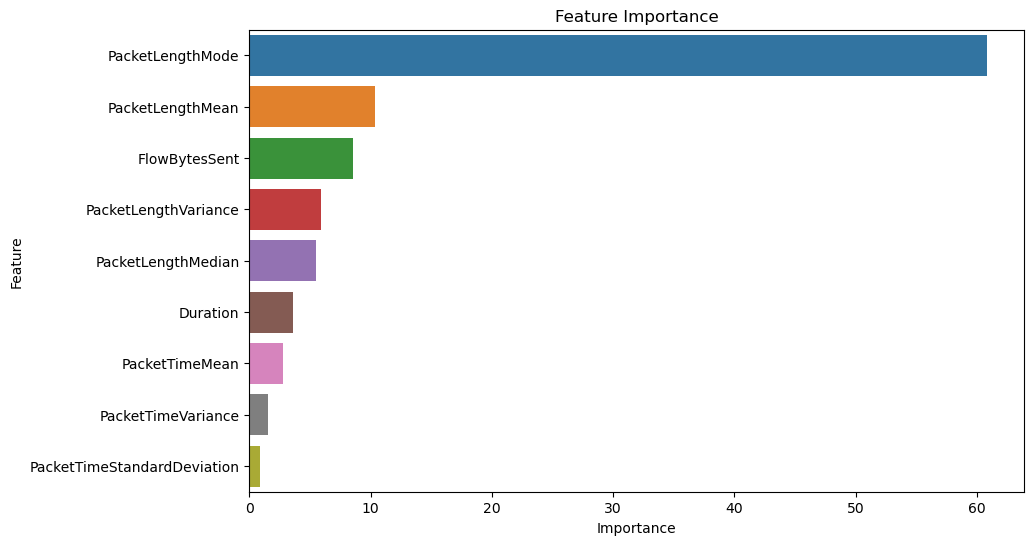

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df1 = pd.read_csv('l1-doh.csv')
df2 = pd.read_csv('l1-nondoh.csv')

# Concatenate datasets
df = pd.concat([df1, df2], ignore_index=True)

# Drop columns not needed for modeling
columns_to_drop = ['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort', 'TimeStamp']
df = df.drop(columns=columns_to_drop)

# Encode the categorical label
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Split dataset into features and target
X = df.drop(columns=['Label'])
y = df['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform feature selection using genetic algorithm
selector = SelectFromModel(estimator=rf, threshold='mean', max_features=10).fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()

# Initialize CatBoost classifier
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', eval_metric='Accuracy', random_state=42)

# Train the model
catboost.fit(X_train_selected, y_train, eval_set=(X_test_selected, y_test), verbose=False)

# Make predictions
y_pred = catboost.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print results
print("Selected Features:", selected_features)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Plot feature importance
feature_importance = catboost.get_feature_importance(type='FeatureImportance')
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Selected Features: ['Duration', 'FlowBytesSent', 'PacketLengthVariance', 'PacketLengthMean', 'PacketLengthMedian', 'PacketLengthMode', 'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean']
Accuracy: 0.9962043970731874
Classification Report:
               precision    recall  f1-score   support

         DoH       1.00      0.99      0.99     53863
      NonDoH       1.00      1.00      1.00    179565

    accuracy                           1.00    233428
   macro avg       1.00      0.99      0.99    233428
weighted avg       1.00      1.00      1.00    233428

False Negatives: 145
False Positives: 741


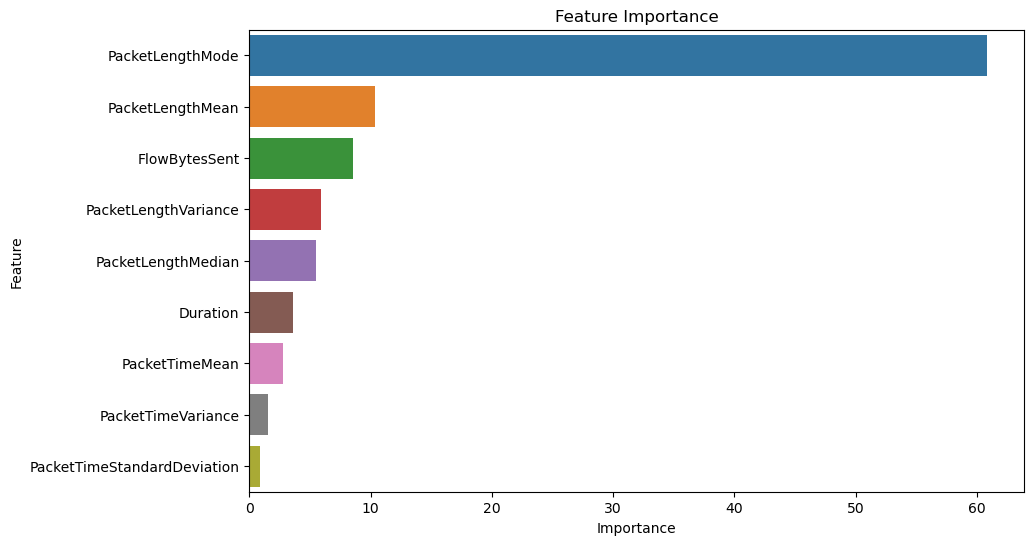

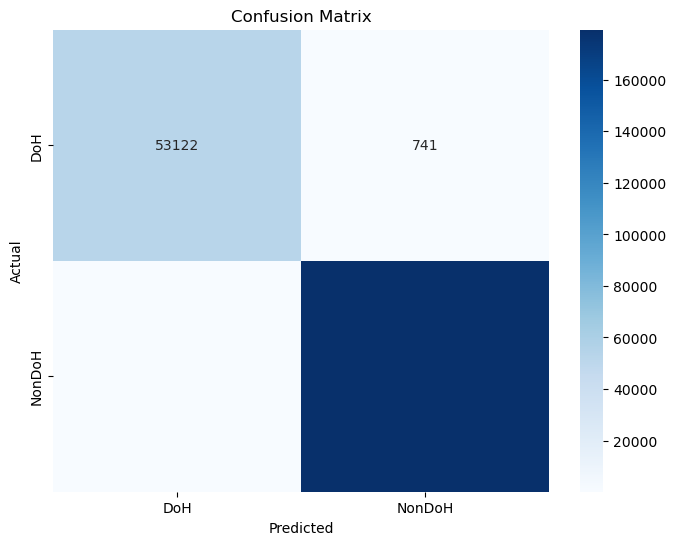

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df1 = pd.read_csv('l1-doh.csv')
df2 = pd.read_csv('l1-nondoh.csv')

# Concatenate datasets
df = pd.concat([df1, df2], ignore_index=True)

# Drop columns not needed for modeling
columns_to_drop = ['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort', 'TimeStamp']
df = df.drop(columns=columns_to_drop)

# Encode the categorical label
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Split dataset into features and target
X = df.drop(columns=['Label'])
y = df['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform feature selection using genetic algorithm
selector = SelectFromModel(estimator=rf, threshold='mean', max_features=10).fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()

# Initialize CatBoost classifier
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', eval_metric='Accuracy', random_state=42)

# Train the model
catboost.fit(X_train_selected, y_train, eval_set=(X_test_selected, y_test), verbose=False)

# Make predictions
y_pred = catboost.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
false_negatives = conf_matrix[1, 0]
false_positives = conf_matrix[0, 1]

# Print results
print("Selected Features:", selected_features)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print(f"False Negatives: {false_negatives}")
print(f"False Positives: {false_positives}")

# Plot feature importance
feature_importance = catboost.get_feature_importance(type='FeatureImportance')
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
